<a href="https://colab.research.google.com/github/okada-t-rafael/time_series_data_analysis/blob/master/52_Forecasting_Introduction_To_Forecasting_Models.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np

In [2]:
from google.colab import files
files.upload()

Saving airline_passengers.csv to airline_passengers.csv


{'airline_passengers.csv': b'"Month","Thousands of Passengers"\n"1949-01",112\n"1949-02",118\n"1949-03",132\n"1949-04",129\n"1949-05",121\n"1949-06",135\n"1949-07",148\n"1949-08",148\n"1949-09",136\n"1949-10",119\n"1949-11",104\n"1949-12",118\n"1950-01",115\n"1950-02",126\n"1950-03",141\n"1950-04",135\n"1950-05",125\n"1950-06",149\n"1950-07",170\n"1950-08",170\n"1950-09",158\n"1950-10",133\n"1950-11",114\n"1950-12",140\n"1951-01",145\n"1951-02",150\n"1951-03",178\n"1951-04",163\n"1951-05",172\n"1951-06",178\n"1951-07",199\n"1951-08",199\n"1951-09",184\n"1951-10",162\n"1951-11",146\n"1951-12",166\n"1952-01",171\n"1952-02",180\n"1952-03",193\n"1952-04",181\n"1952-05",183\n"1952-06",218\n"1952-07",230\n"1952-08",242\n"1952-09",209\n"1952-10",191\n"1952-11",172\n"1952-12",194\n"1953-01",196\n"1953-02",196\n"1953-03",236\n"1953-04",235\n"1953-05",229\n"1953-06",243\n"1953-07",264\n"1953-08",272\n"1953-09",237\n"1953-10",211\n"1953-11",180\n"1953-12",201\n"1954-01",204\n"1954-02",188\n"1954-

In [3]:
df = pd.read_csv('airline_passengers.csv', index_col='Month', parse_dates=True)

In [4]:
df.index.freq = 'MS'

In [5]:
df.head()

,Thousands of Passengers
Month,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121


In [6]:
df.tail()

,Thousands of Passengers
Month,
1960-08-01,606
1960-09-01,508
1960-10-01,461
1960-11-01,390
1960-12-01,432


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 144 entries, 1949-01-01 to 1960-12-01
Freq: MS
Data columns (total 1 columns):
 #   Column                   Non-Null Count  Dtype
---  ------                   --------------  -----
 0   Thousands of Passengers  144 non-null    int64
dtypes: int64(1)
memory usage: 2.2 KB


In [8]:
train_data = df.iloc[:109]
test_data = df.iloc[108:]

In [9]:
from statsmodels.tsa.holtwinters import ExponentialSmoothing

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [58]:
model = ExponentialSmoothing(
    train_data['Thousands of Passengers'],
    trend='mul',
    seasonal='mul',
    seasonal_periods=12)
fitted_model = model.fit()

In [59]:
test_predictions = fitted_model.forecast(36)

In [60]:
test_predictions

1958-02-01    339.140408
1958-03-01    399.277401
1958-04-01    394.227360
1958-05-01    402.541372
1958-06-01    473.133165
1958-07-01    521.801193
1958-08-01    514.525372
1958-09-01    446.222776
1958-10-01    385.432121
1958-11-01    339.645926
1958-12-01    381.452236
1959-01-01    401.211186
1959-02-01    387.157129
1959-03-01    455.808535
1959-04-01    450.043490
1959-05-01    459.534631
1959-06-01    540.121064
1959-07-01    595.679687
1959-08-01    587.373728
1959-09-01    509.400604
1959-10-01    440.002990
1959-11-01    387.734221
1959-12-01    435.459618
1960-01-01    458.016112
1960-02-01    441.972230
1960-03-01    520.343550
1960-04-01    513.762270
1960-05-01    524.597200
1960-06-01    616.593351
1960-07-01    680.018164
1960-08-01    670.536218
1960-09-01    581.523378
1960-10-01    502.300199
1960-11-01    442.631029
1960-12-01    497.113561
1961-01-01    522.863684
Freq: MS, dtype: float64

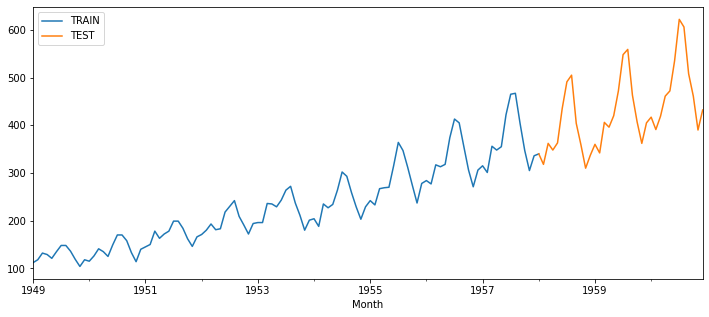

In [61]:
train_data['Thousands of Passengers'].plot(legend=True, label='TRAIN', figsize=(12, 5))
test_data['Thousands of Passengers'].plot(legend=True, label='TEST')

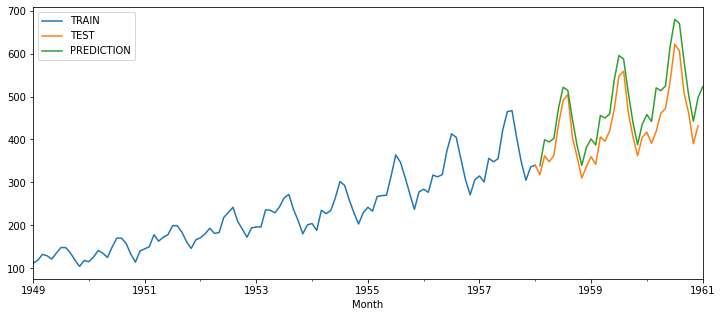

In [62]:
train_data['Thousands of Passengers'].plot(legend=True, label='TRAIN', figsize=(12, 5))
test_data['Thousands of Passengers'].plot(legend=True, label='TEST')
test_predictions.plot(legend=True, label='PREDICTION')

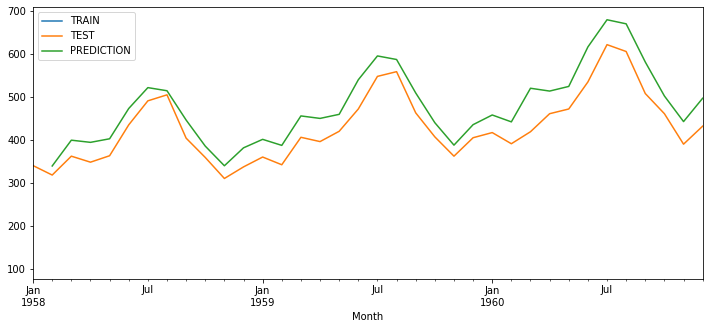

In [63]:
train_data['Thousands of Passengers'].plot(legend=True, label='TRAIN', figsize=(12, 5))
test_data['Thousands of Passengers'].plot(legend=True, label='TEST')
test_predictions.plot(legend=True, label='PREDICTION', xlim=['1958-01-01', '1960-12-01'])

In [29]:
from sklearn.metrics import mean_squared_error, mean_absolute_error

In [64]:
test_data.describe()

,Thousands of Passengers
count,36.000000
mean,428.500000
std,79.329152
min,310.000000
25%,362.000000
50%,412.000000
75%,472.000000
max,622.000000


In [65]:
mean_absolute_error(test_data, test_predictions)

63.03138491847624

In [66]:
mean_squared_error(test_data, test_predictions)

5614.4207149269

In [67]:
np.sqrt(mean_squared_error(test_data, test_predictions))

74.92943823976594

In [69]:
final_model = ExponentialSmoothing(
    df['Thousands of Passengers'],
    trend='mul',
    seasonal='mul',
    seasonal_periods=12).fit()

In [70]:
forecast_predictions = final_model.forecast(36)

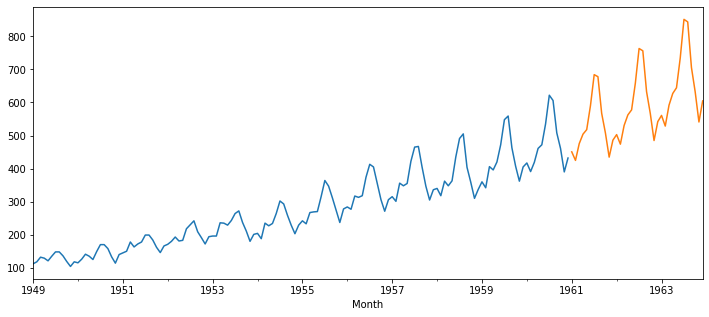

In [71]:
df['Thousands of Passengers'].plot(figsize=(12, 5))
forecast_predictions.plot()

In [52]:
files.upload()

Saving samples.csv to samples.csv


{'samples.csv': b',a,b,c,d\n1/1/1950,36,27,0,67\n2/1/1950,58,22,3,31\n3/1/1950,61,17,5,67\n4/1/1950,37,15,8,47\n5/1/1950,66,13,8,62\n6/1/1950,55,16,19,60\n7/1/1950,60,24,24,53\n8/1/1950,54,16,33,71\n9/1/1950,49,25,44,63\n10/1/1950,65,27,60,46\n11/1/1950,55,26,69,25\n12/1/1950,45,22,85,42\n1/1/1951,31,23,104,62\n2/1/1951,37,20,116,47\n3/1/1951,66,19,139,49\n4/1/1951,50,33,162,72\n5/1/1951,53,21,183,48\n6/1/1951,65,24,202,66\n7/1/1951,55,27,227,44\n8/1/1951,68,19,252,48\n9/1/1951,47,40,281,49\n10/1/1951,44,34,314,27\n11/1/1951,55,36,345,53\n12/1/1951,35,26,377,74\n1/1/1952,53,31,405,47\n2/1/1952,66,31,444,29\n3/1/1952,52,41,478,29\n4/1/1952,34,40,515,63\n5/1/1952,34,43,550,39\n6/1/1952,70,43,597,60\n7/1/1952,34,35,632,48\n8/1/1952,62,25,676,36\n9/1/1952,53,29,726,50\n10/1/1952,35,45,765,67\n11/1/1952,53,42,819,23\n12/1/1952,68,43,861,37\n1/1/1953,30,43,917,63\n2/1/1953,42,43,968,50\n3/1/1953,61,41,1018,37\n4/1/1953,57,42,1075,60\n5/1/1953,36,33,1132,51\n6/1/1953,59,43,1186,49\n7/1/1953,4

In [53]:
df2 = pd.read_csv('samples.csv', index_col=0, parse_dates=True)

In [54]:
df.head()

,Thousands of Passengers
Month,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121


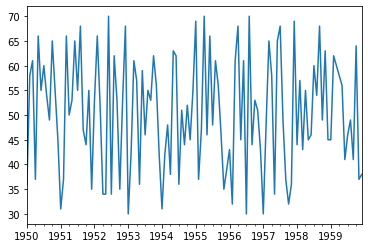

In [55]:
df2['a'].plot()

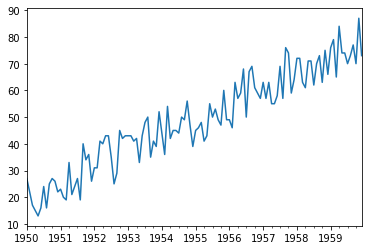

In [57]:
df2['b'].plot()

In [72]:
from statsmodels.tsa.statespace.tools import diff

In [74]:
df2['b'] - df2['b'].shift(1)

1950-01-01     NaN
1950-02-01    -5.0
1950-03-01    -5.0
1950-04-01    -2.0
1950-05-01    -2.0
              ... 
1959-08-01     3.0
1959-09-01     4.0
1959-10-01    -7.0
1959-11-01    17.0
1959-12-01   -14.0
Name: b, Length: 120, dtype: float64

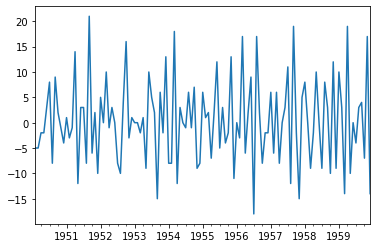

In [76]:
diff(df2['b'], k_diff=1).plot()